In [1]:

#step one : fething the dataset
from sklearn.datasets import fetch_mldata
mnist  = fetch_mldata('MNIST original')
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [2]:
# creat feature and label data
x = mnist['data'] #matrix of features
y = mnist['target'] #vector of labels
print(x.shape,y.shape)

(70000, 784) (70000,)


In [14]:
# let's split the data into 2000 for train and rest for due to my computer capabilities(Do not split like me!)
# it would be better to make 60000 for train and 10000 for test
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=68/70 , random_state = 42)
print(xtrain.shape , ytrain.shape)
digit = y[36000]
Afeature = x[36000]
print(digit) #we will use this digit to apply checks on our prediction

(2000, 784) (2000,)
5.0


In [15]:
# we will use kneighours model and optomizze to get accuracy of 97%
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(xtrain , ytrain)
classifier.predict([Afeature])#below you will find a good predictor 

array([5.])

In [16]:
# let's evaluate our model 
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(classifier , xtrain , ytrain , cv = 3, scoring = 'accuracy')
accuracy


array([0.87761194, 0.87256372, 0.88084465])

In [17]:
accuracy.mean()#we will try to play around the hyper parameters to increase the accuracy up to 90%

0.877006767996655

In [18]:
# for tunning the parameters we will use gridsearch
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
# creat a dictionary of the values with the parameter
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [21]:
# instantiate the grid
grid = GridSearchCV(classifier, param_grid, cv=10, scoring='accuracy')
grid.fit(xtrain ,ytrain )

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [31]:
scores = grid.grid_scores_
grid.best_estimator_  #below ou can find the best parameters to get the ma possible accuracy

E:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [30]:

print(scores[0].cv_validation_scores)
print(scores[0].mean_validation_score)


[0.88235294 0.89705882 0.91176471 0.9009901  0.91       0.90954774
 0.91414141 0.87817259 0.87755102 0.92346939]
{'n_neighbors': 1}
0.9005


In [35]:
# let's visualize the relationbetween the k range and the accuracy
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd 
df=pd.DataFrame(scores)
df['mean_validation_score']

,parameters,mean_validation_score,cv_validation_scores
0,{'n_neighbors': 1},0.9005,"[0.8823529411764706, 0.8970588235294118, 0.911..."
1,{'n_neighbors': 2},0.8795,"[0.8774509803921569, 0.8627450980392157, 0.892..."
2,{'n_neighbors': 3},0.8935,"[0.8921568627450981, 0.8823529411764706, 0.892..."
3,{'n_neighbors': 4},0.8940,"[0.8921568627450981, 0.8872549019607843, 0.906..."
4,{'n_neighbors': 5},0.8980,"[0.8872549019607843, 0.8774509803921569, 0.906..."
5,{'n_neighbors': 6},0.8925,"[0.8823529411764706, 0.8823529411764706, 0.916..."
6,{'n_neighbors': 7},0.8905,"[0.8823529411764706, 0.8774509803921569, 0.906..."
7,{'n_neighbors': 8},0.8915,"[0.8774509803921569, 0.8725490196078431, 0.906..."
8,{'n_neighbors': 9},0.8900,"[0.8774509803921569, 0.8823529411764706, 0.901..."
9,{'n_neighbors': 10},0.8890,"[0.8823529411764706, 0.8774509803921569, 0.897..."


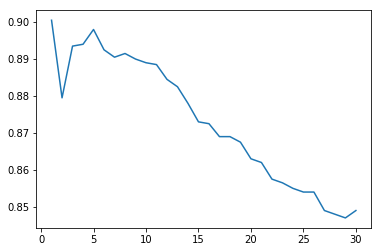

In [38]:
plt.plot(k_range, df['mean_validation_score'])
plt.show()